In [1]:
import pandas as pd
from datetime import datetime, timedelta, date
from random import randint
import numpy as np
import csv
from random import randint
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import os
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import KFold
from sklearn.cross_validation import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import IPython
import unidecode 
from funcoes_uteis import *
import seaborn as sns
import pandas.core.algorithms as algos
from scipy.stats import kendalltau
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes

D:\Users\felipe.santos\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def marca_base(Perc, x):
    if x >= Perc[(len(Perc)-1)]:
        return len(Perc) +1
    else:
        for i in range(len(Perc)):
            if x < Perc[i]:
                return i + 1

def marca_lista(lista, tamanho, variavel):
    i = 0
    for i in range(tamanho):
        if variavel == lista[i]: return i
        
            
def contagens_anteriores(um_df):
    um_df['contagens_anteriores'] = range(len(um_df))
    return um_df

def cria_curva(percentiles, vetor):
    Perc = list()
    for i in range(len(percentiles)):
        Perc.append(np.percentile(vetor, percentiles[i]))
    return Perc

# Cobrança

In [3]:
df_cobranca = pd.read_csv('./base_fe_20170522.csv', sep = ';', 
                          header = 0, 
                          dtype= {2: str})

In [4]:
df_cobranca.fillna(0, inplace= True)
df_cobranca['valor_cliente'] = [x.replace(',', '.') for x in df_cobranca.valor_cliente]
df_cobranca['valor_cliente'] = df_cobranca.valor_cliente.astype(float)
df_cobranca['valor_provisioning'] = [x.replace(',', '.') for x in df_cobranca.valor_provisioning]
df_cobranca['valor_provisioning'] = df_cobranca.valor_provisioning.astype(float)

In [5]:
col_datas = ['dt_pagamento', 'dt_vencimento']
converte_datetime(df_cobranca, col_datas)

In [6]:
df_cobranca['diferenca_dias'] = [abs((d2 - d1).days) if d2.year == 2017 else 0 
                                 for d1, d2 in zip (df_cobranca.dt_vencimento,df_cobranca.dt_pagamento)]

In [7]:
df_cobranca = df_cobranca.sort(['dt_vencimento'], ascending=[1])

D:\Users\felipe.santos\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [8]:
df_cobranca.MES_VENCIMENTO.value_counts()

4    78737
3    76241
2    64907
5    52095
1    51538
Name: MES_VENCIMENTO, dtype: int64

In [9]:
df_cobranca.columns

Index(['﻿cd_ClienteSAP', 'cd_Login', 'cd_provisioning', 'ds_FormaPagamento',
       'ds_Periodicidade', 'fl_ServicoPai', 'mes_idade_cliente',
       'mes_idade_provisioning', 'qtd_inadimplencia', 'qtd_produtos_cliente',
       'valor_cliente', 'valor_provisioning', 'dt_vencimento',
       'ANO_VENCIMENTO', 'MES_VENCIMENTO', 'DIA_VENCIMENTO', 'dt_pagamento',
       'ANO_PAGAMENTO', 'MES_PAGAMENTO', 'DIA_PAGAMENTO', 'fl_pago',
       'fl_cancelado', 'vl_cobranca', 'diferenca_dias'],
      dtype='object')

In [10]:
df_cobranca.sample().T

,260255
﻿cd_ClienteSAP,2000237715
cd_Login,arqueearquitetura
cd_provisioning,61441176
ds_FormaPagamento,Boleto Bancário Itaú
ds_Periodicidade,Trimestral
fl_ServicoPai,SIM
mes_idade_cliente,40
mes_idade_provisioning,40
qtd_inadimplencia,9
qtd_produtos_cliente,8


In [11]:
df_cobranca['Resposta'] = [1 if d> 0 else 0 for d in df_cobranca.diferenca_dias]

In [12]:
df_cobranca.Resposta.mean()

0.7626530826723706

In [12]:
df_cobranca.sample().T

,179674
﻿cd_ClienteSAP,1000329990
cd_Login,salmerao
cd_provisioning,6534901
ds_FormaPagamento,Boleto Bancário Itaú
ds_Periodicidade,Mensal
fl_ServicoPai,SIM
mes_idade_cliente,145
mes_idade_provisioning,42
qtd_inadimplencia,17
qtd_produtos_cliente,14


In [13]:
df_cobranca = df_cobranca.sort(['dt_vencimento'], ascending=[1])

#df_cobranca = df_cobranca.groupby('cd_Login').apply(contagens_anteriores)
#df_cobranca.rename(columns={'contagens_anteriores' : 'contagens_anteriores_cliente'}, inplace=True)

#df_cobranca = df_cobranca.groupby('cd_provisioning').apply(contagens_anteriores)
#df_cobranca.rename(columns={'contagens_anteriores' : 'contagens_anteriores_provisioning'}, inplace=True)

D:\Users\felipe.santos\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [14]:
df_cobranca['AnoMes'] = [datetime(ano, mes, 1) for ano, mes in zip (df_cobranca.ANO_VENCIMENTO, df_cobranca.MES_VENCIMENTO)]
df_cobranca['ChaveModelo'] = [c+ AnoMes for c, AnoMes in zip (df_cobranca.cd_Login, df_cobranca.AnoMes.astype(str))]

In [15]:
df_original = df_cobranca.copy() 

In [16]:
#df_cobranca = df_original.copy() 

In [17]:
df_cobranca['MRR_aux'] = df_cobranca.valor_cliente*df_cobranca.mes_idade_cliente
dict_lista_aux = {'MRR_aux' : 'max'}
aux_MRR = df_cobranca.groupby('cd_Login').agg(dict_lista_aux)
    
percentiles= [10,20,30,40,50,60,70,80,90]
    
Perc = cria_curva(percentiles, aux_MRR.MRR_aux)
aux_MRR['Score_login'] = [marca_base(Perc, x) for x in aux_MRR.MRR_aux]

In [18]:
aux_MRR.sample()

,MRR_aux,Score_login
cd_Login,,
offtecnologia,2031.3,5


In [19]:
df_cobranca.set_index('cd_Login', inplace= True)

In [20]:
df_cobranca = pd.concat([df_cobranca, aux_MRR[['Score_login']]], axis= 1, join_axes=[df_cobranca.index])

In [21]:
lista_ds_FormaPagamento = df_cobranca.ds_FormaPagamento.unique()
tamanho = len(lista_ds_FormaPagamento) 
df_cobranca['ds_FormaPagamento_indice'] = [marca_lista(lista_ds_FormaPagamento, tamanho, variavel) 
                                           for variavel in df_cobranca.ds_FormaPagamento]

lista_ds_Periodicidade = df_cobranca.ds_Periodicidade.unique()
tamanho = len(lista_ds_Periodicidade) 
df_cobranca['ds_Periodicidade_indice'] = [marca_lista(lista_ds_Periodicidade, tamanho, variavel) 
                                          for variavel in df_cobranca.ds_Periodicidade]

lista_fl_ServicoPai = df_cobranca.fl_ServicoPai.unique()
tamanho = len(lista_fl_ServicoPai) 
df_cobranca['fl_ServicoPai_indice'] = [marca_lista(lista_fl_ServicoPai, tamanho, variavel)
                                       for variavel in df_cobranca.fl_ServicoPai]

In [22]:
df_cobranca.sample(2).T

cd_Login,montariaecia,shelterit
﻿cd_ClienteSAP,1002119501,1002301645
cd_provisioning,4690466,61957861
ds_FormaPagamento,Cartão de Crédito,Crédito em C/C
ds_Periodicidade,Trimestral,Mensal
fl_ServicoPai,SIM,SIM
mes_idade_cliente,77,69
mes_idade_provisioning,19,33
qtd_inadimplencia,8,34
qtd_produtos_cliente,3,30
valor_cliente,32.9,188.3


In [23]:
df_cobranca.fillna(0,inplace= True)

In [25]:
df_cobranca.columns

Index(['﻿cd_ClienteSAP', 'cd_provisioning', 'ds_FormaPagamento',
       'ds_Periodicidade', 'fl_ServicoPai', 'mes_idade_cliente',
       'mes_idade_provisioning', 'qtd_inadimplencia', 'qtd_produtos_cliente',
       'valor_cliente', 'valor_provisioning', 'dt_vencimento',
       'ANO_VENCIMENTO', 'MES_VENCIMENTO', 'DIA_VENCIMENTO', 'dt_pagamento',
       'ANO_PAGAMENTO', 'MES_PAGAMENTO', 'DIA_PAGAMENTO', 'fl_pago',
       'fl_cancelado', 'vl_cobranca', 'diferenca_dias', 'Resposta',
       'contagens_anteriores_cliente', 'contagens_anteriores_provisioning',
       'AnoMes', 'ChaveModelo', 'MRR_aux', 'Score_login',
       'ds_FormaPagamento_indice', 'ds_Periodicidade_indice',
       'fl_ServicoPai_indice'],
      dtype='object')

In [224]:
colunas =  ['mes_idade_cliente', 'mes_idade_provisioning',
            'qtd_produtos_cliente',
            'valor_cliente', 'valor_provisioning', 
            'MRR_aux', 'Score_login',
            'ds_Periodicidade_indice', 'fl_ServicoPai_indice',
            'Resposta']
     
     
# shuffle rows
X = df_cobranca[colunas].copy().sample(frac = 1)

# create X and y matrices
y = X.Resposta.values
X = X.reset_index(drop=True).drop('Resposta', axis = 1).values

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)

auc_list = []
k = 1
for train, valid in skf.split(X, y):
    print('Fold #', k)
    print("train indices: %s\nvalidation indices %s" % (train, valid))
    clf = RandomForestClassifier(class_weight='balanced', n_estimators=500, max_depth=10)
    clf.fit(X[train], y[train])
    y_pred = clf.predict_proba(X[valid])
    auc = roc_auc_score(y[valid], y_pred[:,1])
    auc_list.append(auc)
    print('AUC on fold #', k, ':', auc, '\n')
    k += 1
    
print('Average AUC on', k-1, 'folds:', np.mean(auc_list))  

Fold # 1
train indices: [107739 107740 107741 ..., 323515 323516 323517]
validation indices [     0      1      2 ..., 108146 108153 108157]
AUC on fold # 1 : 0.842458972493 

Fold # 2
train indices: [     0      1      2 ..., 323515 323516 323517]
validation indices [107739 107740 107741 ..., 215916 215917 215927]
AUC on fold # 2 : 0.840428218164 

Fold # 3
train indices: [     0      1      2 ..., 215916 215917 215927]
validation indices [215588 215591 215593 ..., 323515 323516 323517]
AUC on fold # 3 : 0.83908209458 

Average AUC on 3 folds: 0.840656428412


# Marca Base 

In [225]:
colunas =  ['mes_idade_cliente', 'mes_idade_provisioning',
            'qtd_produtos_cliente',
            'valor_cliente', 'valor_provisioning', 
            'MRR_aux', 'Score_login',
            'ds_Periodicidade_indice', 'fl_ServicoPai_indice']
     
# shuffle rows
X = df_cobranca[colunas].copy()
X = scaler.fit_transform(X)

In [226]:
y_pred = clf.predict_proba(X)
y_pred = pd.DataFrame(data=y_pred[:,1])
y_pred.rename(columns= {0: 'Prob_Pagamento'}, inplace= True)

In [227]:
y_pred.head()

,Prob_Pagamento
0,0.168674
1,0.243646
2,0.358051
3,0.612466
4,0.576266


In [228]:
df_cobranca.head()

,﻿cd_ClienteSAP,cd_provisioning,ds_FormaPagamento,ds_Periodicidade,fl_ServicoPai,mes_idade_cliente,mes_idade_provisioning,qtd_inadimplencia,qtd_produtos_cliente,valor_cliente,...,Resposta,contagens_anteriores_cliente,contagens_anteriores_provisioning,AnoMes,ChaveModelo,MRR_aux,Score_login,ds_FormaPagamento_indice,ds_Periodicidade_indice,fl_ServicoPai_indice
cd_Login,,,,,,,,,,,,,,,,,,,,,
maximusidc,2000807834,64365107,Cupom de Desconto,Mensal,NAO,5.0,4,11,11,3258.8,...,1,0,0,2017-01-01,maximusidc2017-01-01,16294.0,10,0,0,0
gs3,2000509093,63457765,Crédito em C/C,Trimestral,nao,22.0,15,10,6,21.1,...,1,0,0,2017-01-01,gs32017-01-01,464.2,2,1,1,1
maxacunha,2000810263,64372479,Crédito em C/C,Mensal,NAO,4.0,4,8,8,90.9,...,1,0,0,2017-01-01,maxacunha2017-01-01,363.6,1,1,0,0
carlospanda,2000807683,64365130,Boleto Bancário Itaú,Anual,SIM,4.0,4,11,6,35.9,...,1,0,0,2017-01-01,carlospanda2017-01-01,143.6,1,2,2,2
enxovais87,2000809454,64364530,Boleto Bancário Itaú,Anual,SIM,4.0,4,1,1,79.9,...,1,0,0,2017-01-01,enxovais872017-01-01,319.6,1,2,2,2


In [229]:
df_consolida = pd.concat([df_cobranca.reset_index(), y_pred], axis=1)

In [230]:
df_consolida.head().T

,0,1,2,3,4
cd_Login,maximusidc,gs3,maxacunha,carlospanda,enxovais87
﻿cd_ClienteSAP,2000807834,2000509093,2000810263,2000807683,2000809454
cd_provisioning,64365107,63457765,64372479,64365130,64364530
ds_FormaPagamento,Cupom de Desconto,Crédito em C/C,Crédito em C/C,Boleto Bancário Itaú,Boleto Bancário Itaú
ds_Periodicidade,Mensal,Trimestral,Mensal,Anual,Anual
fl_ServicoPai,NAO,nao,NAO,SIM,SIM
mes_idade_cliente,5,22,4,4,4
mes_idade_provisioning,4,15,4,4,4
qtd_inadimplencia,11,10,8,11,1
qtd_produtos_cliente,11,6,8,6,1


In [231]:
percentiles = list()
inicio = 0
fim = 100
salto = 0.25
aux = round((fim - inicio)/salto)
for i in range(aux):
    percentiles.append((inicio +i*salto))
Perc = cria_curva(percentiles, df_consolida.Prob_Pagamento)
df_consolida['Prob_Grupo'] = [marca_base(Perc, x) for x in df_consolida.Prob_Pagamento]
dict_lista_aux = {'cd_Login' : 'count',
                  'Prob_Pagamento' : 'min',
                  'Resposta' : 'mean'}
RESUMO = df_consolida.groupby('Prob_Grupo').agg(dict_lista_aux)
RESUMO.sort_values(['Prob_Pagamento'], ascending= 0 ,inplace=True)
RESUMO.Prob_Pagamento = round(RESUMO.Prob_Pagamento, ndigits = 2)
RESUMO['Resposta_aux'] = [p*q for p, q in zip (RESUMO.Resposta, RESUMO.cd_Login)]
RESUMO['acumulado'] = RESUMO.cd_Login.cumsum()
RESUMO['Prob_acumulado'] = RESUMO.Resposta_aux.cumsum()
RESUMO['Resposta_acumulado'] = [p/q for p, q in zip (RESUMO.Prob_acumulado, RESUMO.acumulado)]
RESUMO['Prob_Pagamento_aux'] = [p*q for p, q in zip (RESUMO.Prob_Pagamento, RESUMO.cd_Login)]
RESUMO['acumulado'] = RESUMO.cd_Login.cumsum()
RESUMO['Prob_acumulado'] = RESUMO.Prob_Pagamento_aux.cumsum()
RESUMO['Prob_up_acumulado'] = [p/q for p, q in zip (RESUMO.Prob_acumulado, RESUMO.acumulado)]

RESUMO['cd_Login_perc'] = RESUMO.cd_Login/RESUMO.cd_Login.sum()
RESUMO.reset_index(inplace= True)

In [232]:
RESUMO.head()

,Prob_Grupo,Prob_Pagamento,Resposta,cd_Login,Resposta_aux,acumulado,Prob_acumulado,Resposta_acumulado,Prob_Pagamento_aux,Prob_up_acumulado,cd_Login_perc
0,401,0.85,0.991347,809,802.0,809,687.65,0.991347,687.65,0.850000,0.002501
1,400,0.84,0.979012,810,793.0,1619,1368.05,0.985176,680.40,0.844997,0.002504
2,399,0.84,0.982822,815,801.0,2434,2052.65,0.984388,684.60,0.843324,0.002519
3,398,0.84,0.983791,802,789.0,3236,2726.33,0.984240,673.68,0.842500,0.002479
4,397,0.84,0.971535,808,785.0,4044,3405.05,0.981701,678.72,0.842000,0.002498


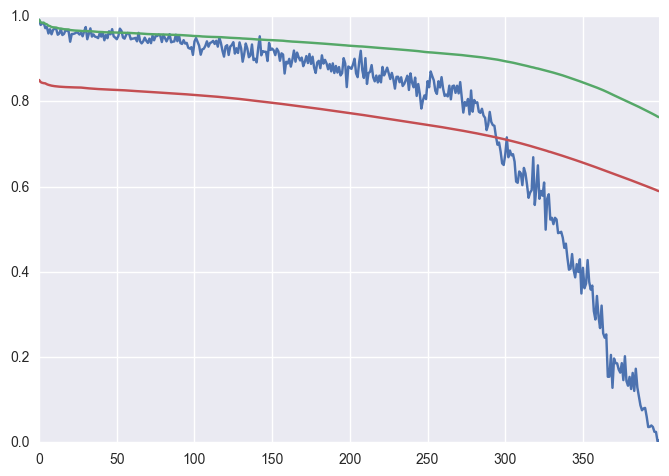

In [233]:
RESUMO.Resposta.plot()
RESUMO.Resposta_acumulado.plot()
RESUMO.Prob_up_acumulado.plot()

In [234]:
df_consolida.columns

Index(['cd_Login', '﻿cd_ClienteSAP', 'cd_provisioning', 'ds_FormaPagamento',
       'ds_Periodicidade', 'fl_ServicoPai', 'mes_idade_cliente',
       'mes_idade_provisioning', 'qtd_inadimplencia', 'qtd_produtos_cliente',
       'valor_cliente', 'valor_provisioning', 'dt_vencimento',
       'ANO_VENCIMENTO', 'MES_VENCIMENTO', 'DIA_VENCIMENTO', 'dt_pagamento',
       'ANO_PAGAMENTO', 'MES_PAGAMENTO', 'DIA_PAGAMENTO', 'fl_pago',
       'fl_cancelado', 'vl_cobranca', 'diferenca_dias', 'Resposta',
       'contagens_anteriores_cliente', 'contagens_anteriores_provisioning',
       'AnoMes', 'ChaveModelo', 'MRR_aux', 'Score_login',
       'ds_FormaPagamento_indice', 'ds_Periodicidade_indice',
       'fl_ServicoPai_indice', 'Prob_Pagamento', 'Prob_Grupo'],
      dtype='object')

In [235]:
df_consolida.sort_values(['dt_vencimento'], ascending= 0 ,inplace=True)
df_consolida[df_consolida.cd_Login.duplicated(keep= 'first') == False].shape

(132885, 36)

# Cortando em Decis

In [236]:
dict_lista_aux = {'cd_provisioning' : 'count',
                  'Prob_Pagamento' : 'mean',
                  'Score_login': 'max',
                  'Resposta' : 'max'}

df_cobranca_aplicacao = df_consolida.reset_index().groupby('cd_Login').agg(dict_lista_aux)
df_cobranca_aplicacao = df_cobranca_aplicacao.sort(['Prob_Pagamento'], ascending=[1])
df_cobranca_aplicacao.reset_index(inplace= True)
df_cobranca_aplicacao.reset_index(inplace= True)
df_cobranca_aplicacao.head(10)

D:\Users\felipe.santos\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,index,cd_Login,Prob_Pagamento,Score_login,cd_provisioning,Resposta
0,0,idealreservas,0.014023,2,1,0
1,1,setejr,0.014023,2,1,0
2,2,outmind,0.014341,2,1,0
3,3,miguelerafael,0.014526,2,1,0
4,4,bentoag,0.014526,2,1,0
5,5,servstartup,0.014526,2,1,0
6,6,cris106,0.014526,2,1,0
7,7,blogdevroots,0.014526,2,1,0
8,8,mfachurch,0.014526,2,1,0
9,9,royalbrows,0.014526,2,1,0


In [237]:
c1 = int(0.1*df_cobranca_aplicacao.index.max())


Clusters = [c1, 
            2*c1,
            3*c1,
            4*c1,
            5*c1,
            6*c1,
            7*c1,
            8*c1,
            9*c1]

Clusters

[13288, 26576, 39864, 53152, 66440, 79728, 93016, 106304, 119592]

In [238]:
df_cobranca_aplicacao['Cluster'] = [marca_base(Clusters, x) for x in df_cobranca_aplicacao.index]

In [239]:
df_cobranca_aplicacao.sample(10)

,index,cd_Login,Prob_Pagamento,Score_login,cd_provisioning,Resposta,Cluster
11623,11623,equipamentos1,0.095456,2,1,0,1
106766,106766,centermat,0.789318,8,1,0,9
92238,92238,validedigital,0.721702,1,2,1,7
72819,72819,ajwebdesigner,0.631662,5,3,1,6
74683,74683,zoomfoccus,0.641310,8,4,1,6
48214,48214,dbsite1,0.469130,7,22,1,4
63457,63457,acnetonline,0.594420,10,6,0,5
76678,76678,lyons17686,0.650202,5,1,1,6
63491,63491,aboulafc,0.594552,4,1,1,5
63975,63975,proset,0.597242,4,1,1,5


Score_login,1,2,3,4,5,6,7,8,9,10
Cluster,,,,,,,,,,
9,0.977778,1.000000,1.000000,0.955932,0.966997,0.975788,0.967118,0.977316,0.967707,0.958910
8,0.961538,1.000000,0.955556,0.990783,0.969796,0.962944,0.966647,0.947026,0.949787,0.956837
7,0.911111,0.948617,0.966767,0.957182,0.932638,0.931774,0.927358,0.929967,0.932275,0.909560
6,0.934783,0.974359,0.931437,0.911256,0.905232,0.900939,0.912717,0.910626,0.900893,0.897741
5,0.948718,0.926042,0.893575,0.878165,0.871257,0.878261,0.860032,0.872363,0.877212,0.847775
4,0.825553,0.804132,0.800514,0.767694,0.756026,0.743455,0.736383,0.727742,0.694891,0.698198
3,0.674089,0.651233,0.619547,0.530494,0.486218,0.495392,0.484375,0.432950,0.510280,0.490119
2,0.414005,0.339991,0.295374,0.282819,0.301047,0.292154,0.242857,0.297753,0.318766,0.203209
1,0.138861,0.052174,0.104455,0.070946,0.076752,0.102985,0.122830,0.136150,0.044693,0.096154


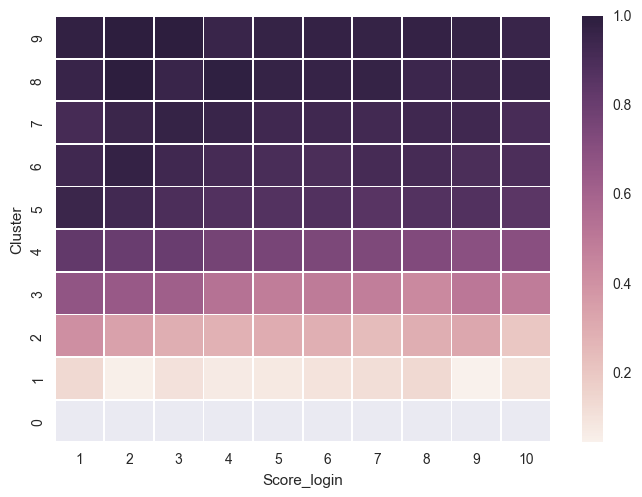

In [240]:
agg_dict_heatmap = {'Resposta' : 'mean'}
heatmap = df_cobranca_aplicacao.groupby(['Cluster','Score_login']).agg(agg_dict_heatmap).copy()
heatmap.reset_index(inplace= True)
heatmap = heatmap.pivot('Cluster','Score_login', 'Resposta').copy()
heatmap = heatmap.reindex(range(len(heatmap)- 1, -1,-1))
sns.heatmap(heatmap, annot=False, linewidths=.5) 
heatmap

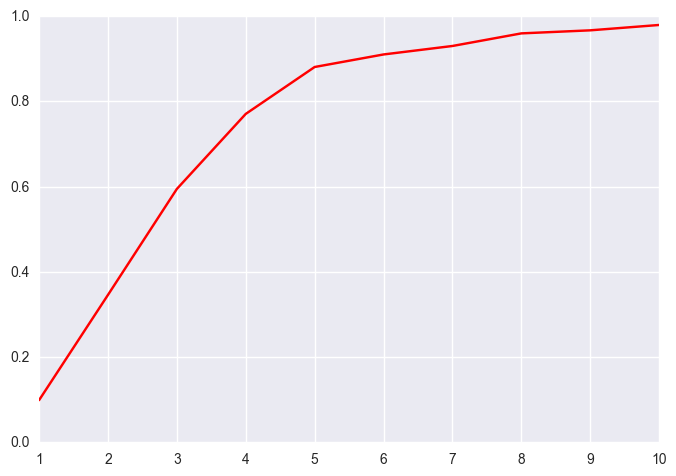

In [241]:
agg_dict_heatmap = {'Resposta' : 'mean'}
plt.plot(df_cobranca_aplicacao.groupby(['Cluster']).agg(agg_dict_heatmap),'r') # plotting t,a separately

Score_login,1,2,3,4,5,6,7,8,9,10
Cluster,,,,,,,,,,
9,45.0,1.0,3.0,2065.0,2121.0,1776.0,1551.0,1587.0,1827.0,2312.0
8,52.0,2.0,315.0,651.0,1523.0,1916.0,1709.0,2152.0,2350.0,2618.0
7,45.0,253.0,331.0,724.0,1054.0,1539.0,2354.0,2713.0,2141.0,2134.0
6,46.0,156.0,1371.0,2141.0,2332.0,2130.0,1730.0,1421.0,1120.0,841.0
5,156.0,960.0,2537.0,2528.0,1670.0,1495.0,1236.0,948.0,904.0,854.0
4,1221.0,2420.0,2336.0,1752.0,1369.0,1146.0,918.0,775.0,685.0,666.0
3,1976.0,4298.0,2384.0,1033.0,907.0,868.0,512.0,522.0,535.0,253.0
2,5198.0,2203.0,1967.0,1135.0,764.0,599.0,490.0,356.0,389.0,187.0
1,4004.0,3105.0,2020.0,1184.0,899.0,670.0,749.0,426.0,179.0,52.0


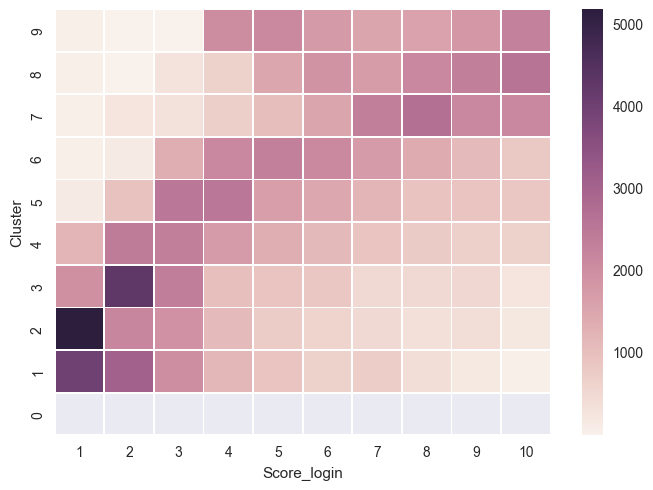

In [242]:
agg_dict_heatmap = {'cd_Login' : 'count'}
heatmap = df_cobranca_aplicacao.groupby(['Cluster','Score_login']).agg(agg_dict_heatmap).copy()
heatmap.reset_index(inplace= True)
heatmap = heatmap.pivot('Cluster','Score_login', 'cd_Login').copy()
heatmap = heatmap.reindex(range(len(heatmap)- 1, -1,-1))
sns.heatmap(heatmap, annot=False, linewidths=.5) 
heatmap

In [243]:
def cria_grupo(n1, n2):
    if n1 <= 3 and n2 <=5:
        return 'Grupo1: d+7'
    else:
        if n1 > 3 and n2 <=5:
            return 'Grupo2: d+10'
        else:
            if n1<= 6 and n2 >5:
                return 'Grupo3: d+15'
            else:
                if n1 > 6 and n2 >6:
                    return 'Grupo4: d+30'            

In [244]:
df_cobranca_aplicacao['GrupoDesativacao'] = [cria_grupo(n1, n2) for n1, n2 in 
                                             zip (df_cobranca_aplicacao.Cluster,df_cobranca_aplicacao.Score_login)]

In [245]:
df_cobranca_aplicacao.head()

,index,cd_Login,Prob_Pagamento,Score_login,cd_provisioning,Resposta,Cluster,GrupoDesativacao
0,0,idealreservas,0.014023,2,1,0,1,Grupo1: d+7
1,1,setejr,0.014023,2,1,0,1,Grupo1: d+7
2,2,outmind,0.014341,2,1,0,1,Grupo1: d+7
3,3,miguelerafael,0.014526,2,1,0,1,Grupo1: d+7
4,4,bentoag,0.014526,2,1,0,1,Grupo1: d+7


In [246]:
df_cobranca_aplicacao.cd_Login.duplicated().value_counts()

False    132885
Name: cd_Login, dtype: int64

In [247]:
agg_dict_heatmap = {'cd_Login' : 'count',
                    'Resposta' : 'mean'}

relatorio = df_cobranca_aplicacao.groupby(['GrupoDesativacao']).agg(agg_dict_heatmap).copy()
relatorio['Tamanho%'] = relatorio.cd_Login/relatorio.cd_Login.sum()

In [248]:
relatorio[['Resposta', 'Tamanho%']]

,Resposta,Tamanho%
GrupoDesativacao,,
Grupo1: d+7,0.354083,0.261822
Grupo2: d+10,0.889810,0.262700
Grupo3: d+15,0.693439,0.187250
Grupo4: d+30,0.956801,0.288228


# Aplicação 24/08/2017

In [249]:
df_cobranca[colunas].sample().T

cd_Login,elaconduz
mes_idade_cliente,41.0
mes_idade_provisioning,41.0
qtd_produtos_cliente,6.0
valor_cliente,35.2
valor_provisioning,35.2
MRR_aux,1443.2
Score_login,4.0
ds_Periodicidade_indice,1.0
fl_ServicoPai_indice,2.0


In [250]:
LoginsCiclo_20082017 = pd.read_csv('./Logins.txt', header= None)

In [251]:
LoginsCiclo_20082017.rename(columns={0 : 'cd_Login'}, inplace=True)

In [252]:
LoginsCiclo_20082017.cd_Login.duplicated().value_counts()

False    12060
True      8602
Name: cd_Login, dtype: int64

In [253]:
LoginsCiclo_20082017 = LoginsCiclo_20082017[LoginsCiclo_20082017.cd_Login.duplicated(keep= 'first') == False].copy()

In [254]:
LoginsCiclo_20082017.head()

,cd_Login
0,elofarma
3,eticatel
4,premixbrasil
5,lgfaustino
6,j2solution


In [255]:
LoginsCiclo_20082017.shape

(12060, 1)

In [256]:
df_base = pd.read_csv('D:/Users/felipe.santos/Desktop/Algoritmos/AlgoritmosTodosProdutos/Churn_Consumo_Recomendacao_18.08.2017.csv'
                      , error_bad_lines = False
                      , sep=';'
                      , dtype= {7: str}
                      , encoding='latin-1'
                      , header = 0)

In [258]:
tamanho = len(lista_ds_Periodicidade) 
df_base['ds_Periodicidade_indice'] = [marca_lista(lista_ds_Periodicidade, tamanho, variavel) 
                                          for variavel in df_base.ds_Periodicidade]

tamanho = len(lista_fl_ServicoPai) 
df_base['fl_ServicoPai_indice'] = [marca_lista(lista_fl_ServicoPai, tamanho, variavel)
                                       for variavel in df_base.fl_ServicoPai]

In [259]:
def diff_month(d1, d2):
    return (d1.year - d2.year)*12 + d1.month - d2.month

def periodicidade(x):
    if x == 'Trienal':
        return 36    
    elif x == 'Anual':
        return 12
    elif x == 'Semestral':
        return 6
    elif x == 'Trimestral':
        return 3
    else: 
        return 1

def marca_lista(lista, tamanho, variavel):
    i = 0
    for i in range(tamanho):
        if variavel == lista[i]: return i
                
def cria_curva(percentiles, variavel):
    Perc = list()
    for i in range(len(percentiles)):
        Perc.append(np.percentile(variavel, percentiles[i]))
    return Perc

def marca_base(Perc, x):
    if x >= Perc[(len(Perc)-1)]:
        return len(Perc) +1
    else:
        for i in range(len(Perc)):
            if x < Perc[i]:
                return i + 1
            
            
            
            
df_base['Status'] = ['ativo' if s in ['Ativo', 'Atendido', 'Em ativação',
                                      'Aguardando ativação'] else 'inativo'
                     for s in df_base.Status]


df_base['fl_Dev'] = df_base['fl_Dev'].astype(float,)

df_base = df_base[(df_base.nr_PrecoMensal > '0,00')].copy()
df_base.sort_values(['Instalacao'], ascending= 1 ,inplace=True)
df_base.drop_duplicates(['Provisioning'], keep='last', inplace= True)
col_datas = ['Data_Desativacao', 'Data_Fim', 'Instalacao', 'dt_Reativacao', 'Primeiro_Servico_LW']
converte_datetime(df_base, col_datas)
df_base['Data_Fim_flag'] = [1 if d_fim != datetime(1900,1,1) else 0 for d_fim in df_base.Data_Fim]
df_base['Data_Desativacao_flag'] = [1 if f_des != datetime(1900,1,1) else 0 for f_des in df_base.Data_Desativacao]
df_base['Data_Desativacao_flag'] = [1 if f_des != datetime(1900,1,1) else 0 for f_des in df_base.Data_Desativacao]
df_base['Data_churn'] = df_base[['Data_Fim', 'Data_Desativacao']].min(axis = 1).astype('datetime64[ns]')
df_base['Data_churn'] = [d_fim if ((d_des < d_rea < d_fim) & f_fim & f_des) else d_chu
                              for d_des, d_rea, d_fim, f_fim, f_des, d_chu in 
                              zip(df_base.Data_Desativacao, df_base.dt_Reativacao, 
                                  df_base.Data_Fim, df_base.Data_Fim_flag, 
                                  df_base.Data_Desativacao_flag, df_base.Data_churn)]
df_base['Data_churn_flag'] = [1 if d > datetime(1900, 1, 1) else 0 for d in df_base.Data_churn]

#######################################

df_base = df_base[df_base.Primeiro_Servico_LW >= datetime(1990,1,1)].copy()  #

#######################################


df_base['Primeiro_Servico_LW_AnoMes'] = [datetime(d.year, d.month, 1) for d in df_base.Primeiro_Servico_LW]
df_base['Instalacao_AnoMes'] = [datetime(d.year, d.month, 1) for d in df_base.Instalacao]
df_base['Data_churn_AnoMes'] = [datetime(d.year, d.month, 1) for d in df_base.Data_churn]
df_base['fl_ServicoPai'] = [1 if s in ['SIM', 'Sim', 'sim'] else 0 for s in df_base.fl_ServicoPai]
df_base['fl_GerenteConta'] = [0 if s== 1 else 1 for s in df_base.id_GerenteConta]
df_base['nr_PrecoMensal'] = [x.replace(',', '.') for x in df_base.nr_PrecoMensal]
df_base['nr_PrecoMensal'] = df_base.nr_PrecoMensal.astype(float)
df_base['MesesParaChurn'] = [diff_month(ch, ins) if ch > datetime(1900, 1, 1) else 0
                           for ch, ins in  zip(df_base.Data_churn, df_base.Instalacao)]
df_base['FlagChurn'] = [1 if d!= 0 else 0 for d in df_base.MesesParaChurn]

In [260]:
df_base.columns

Index(['Provisioning', 'cd_ChaveCliente', 'nr_PrecoMensal', 'ds_Periodicidade',
       'Instalacao', 'Primeiro_Servico_LW', 'dt_Reativacao', 'fl_ServicoPai',
       'id_GerenteConta', 'Servico', 'fl_Dev', 'Perfil', 'classificacao',
       'Status', 'Data_Fim', 'Data_Desativacao', 'ds_Periodicidade_indice',
       'fl_ServicoPai_indice', 'Data_Fim_flag', 'Data_Desativacao_flag',
       'Data_churn', 'Data_churn_flag', 'Primeiro_Servico_LW_AnoMes',
       'Instalacao_AnoMes', 'Data_churn_AnoMes', 'fl_GerenteConta',
       'MesesParaChurn', 'FlagChurn'],
      dtype='object')

In [261]:
HelpFlose = pd.read_csv('./HelpFlose.csv', header = 0, sep=';')
HelpFlose.rename(columns={'cd_Cliente' : 'cd_Login', 'cd_Provisioning':'Provisioning'}, inplace=True)

In [262]:
HelpFlose.sample(10)

,cd_Login,Provisioning
196649,netestudio1,8764512
170810,cpditb,61925411
93815,reatoscomunicacao,63532635
225572,amixel,8328800
162569,oabpi,63470598
130446,impercap,60631886
177514,dnadobrasil,6287228
202491,w3telecom,60719449
86673,marfcontabilidade,68472
114997,verbe,63419484


In [263]:
HelpFlose.Provisioning.duplicated().value_counts()

False    250525
True         32
Name: Provisioning, dtype: int64

In [264]:
HelpFlose.cd_Login.duplicated().value_counts()

True     238502
False     12055
Name: cd_Login, dtype: int64

In [265]:
HelpFlose = pd.merge(df_base[['Provisioning','cd_ChaveCliente']], HelpFlose, how='inner', on=['Provisioning'])
HelpFlose.shape

(43782, 3)

In [266]:
HelpFlose.sample()

,Provisioning,cd_ChaveCliente,cd_Login
7638,411282,__09054570000139__,marko1


In [267]:
HelpFlose.Provisioning.duplicated().value_counts()

False    43782
Name: Provisioning, dtype: int64

In [268]:
HelpFlose.cd_Login.duplicated().value_counts()

True     31760
False    12022
Name: cd_Login, dtype: int64

In [269]:
HelpFlose = HelpFlose[HelpFlose.cd_Login.duplicated(keep= 'first') == False].copy()
HelpFlose.cd_Login.duplicated().value_counts()

False    12022
Name: cd_Login, dtype: int64

In [270]:
HelpFlose.columns

Index(['Provisioning', 'cd_ChaveCliente', 'cd_Login'], dtype='object')

In [271]:
df_base.columns

Index(['Provisioning', 'cd_ChaveCliente', 'nr_PrecoMensal', 'ds_Periodicidade',
       'Instalacao', 'Primeiro_Servico_LW', 'dt_Reativacao', 'fl_ServicoPai',
       'id_GerenteConta', 'Servico', 'fl_Dev', 'Perfil', 'classificacao',
       'Status', 'Data_Fim', 'Data_Desativacao', 'ds_Periodicidade_indice',
       'fl_ServicoPai_indice', 'Data_Fim_flag', 'Data_Desativacao_flag',
       'Data_churn', 'Data_churn_flag', 'Primeiro_Servico_LW_AnoMes',
       'Instalacao_AnoMes', 'Data_churn_AnoMes', 'fl_GerenteConta',
       'MesesParaChurn', 'FlagChurn'],
      dtype='object')

In [272]:
df_base = pd.merge(df_base, HelpFlose[['cd_ChaveCliente', 'cd_Login']], how='inner', on=['cd_ChaveCliente'])

In [273]:
df_base.columns

Index(['Provisioning', 'cd_ChaveCliente', 'nr_PrecoMensal', 'ds_Periodicidade',
       'Instalacao', 'Primeiro_Servico_LW', 'dt_Reativacao', 'fl_ServicoPai',
       'id_GerenteConta', 'Servico', 'fl_Dev', 'Perfil', 'classificacao',
       'Status', 'Data_Fim', 'Data_Desativacao', 'ds_Periodicidade_indice',
       'fl_ServicoPai_indice', 'Data_Fim_flag', 'Data_Desativacao_flag',
       'Data_churn', 'Data_churn_flag', 'Primeiro_Servico_LW_AnoMes',
       'Instalacao_AnoMes', 'Data_churn_AnoMes', 'fl_GerenteConta',
       'MesesParaChurn', 'FlagChurn', 'cd_Login'],
      dtype='object')

In [274]:
df_base['mes_idade_cliente'] = [diff_month(df_base.Instalacao.max(), d) for d in df_base.Primeiro_Servico_LW]
df_base['mes_idade_provisioning'] = [diff_month(df_base.Instalacao.max(), d) for d in df_base.Instalacao]

In [275]:
df_base.rename(columns={'nr_PrecoMensal' : 'valor_provisioning'}, inplace=True)
df_base['valor_cliente'] = df_base.valor_provisioning
df_base['MRR_aux'] = df_base.valor_cliente*df_base.mes_idade_provisioning

In [281]:
agg_dict = {'Provisioning' : 'count',
            'mes_idade_cliente': 'max',
            'mes_idade_provisioning': 'mean',
            'valor_provisioning': 'mean',
            'valor_cliente': 'sum',
            'MRR_aux': 'sum',
            'fl_ServicoPai_indice': 'max',
            'ds_Periodicidade_indice': 'max'}

df_basefinal = df_base.groupby(['cd_Login']).agg(agg_dict).copy()

In [282]:
df_basefinal.rename(columns={'Provisioning' : 'qtd_produtos_cliente'}, inplace=True)
df_basefinal.sample().T

cd_Login,athenaseguros
mes_idade_cliente,156.0
ds_Periodicidade_indice,1.0
valor_cliente,35.3
valor_provisioning,35.3
MRR_aux,776.6
mes_idade_provisioning,22.0
qtd_produtos_cliente,1.0
fl_ServicoPai_indice,2.0


In [283]:
percentiles= [10,20,30,40,50,60,70,80,90]
    
Perc = cria_curva(percentiles, df_basefinal.MRR_aux)
df_basefinal['Score_login'] = [marca_base(Perc, x) for x in df_basefinal.MRR_aux]

In [284]:
df_basefinal.sample().T

cd_Login,mfranetto
mes_idade_cliente,88.000000
ds_Periodicidade_indice,2.000000
valor_cliente,175.700000
valor_provisioning,58.566667
MRR_aux,7906.500000
mes_idade_provisioning,45.000000
qtd_produtos_cliente,3.000000
fl_ServicoPai_indice,2.000000
Score_login,7.000000


In [285]:
colunas =  ['mes_idade_cliente', 'mes_idade_provisioning',
            'qtd_produtos_cliente',
            'valor_cliente', 'valor_provisioning', 
            'MRR_aux', 'Score_login',
            'ds_Periodicidade_indice', 'fl_ServicoPai_indice']
     
# shuffle rows
X = df_basefinal[colunas].copy()
X = scaler.fit_transform(X)

In [286]:
y_pred = clf.predict_proba(X)
y_pred = pd.DataFrame(data=y_pred[:,1])
y_pred.rename(columns= {0: 'Prob_Pagamento'}, inplace= True)

In [287]:
y_pred.head()

,Prob_Pagamento
0,0.634499
1,0.638513
2,0.775946
3,0.771423
4,0.791706


In [288]:
df_basefinal = pd.concat([df_basefinal.reset_index(), y_pred], axis=1)

In [289]:
df_basefinal.head().T

,0,1,2,3,4
cd_Login,5asec_idc,ADMMAGIFLUX,AFPM,AG3TELECOM,AGSPecas
mes_idade_cliente,146,72,59,71,80
ds_Periodicidade_indice,1,2,1,2,0
valor_cliente,5871.9,115.8,238.8,90.1,108.8
valor_provisioning,533.809,38.6,47.76,45.05,54.4
MRR_aux,49812.6,3051,7535.6,6397.1,3996
mes_idade_provisioning,19.5455,20,42.6,71,36
qtd_produtos_cliente,11,3,5,2,2
fl_ServicoPai_indice,2,2,2,2,2
Score_login,10,4,7,7,5


In [292]:
df_basefinal.reset_index(inplace= True)

In [293]:
c1 = int(0.1*df_basefinal.index.max())


Clusters = [c1, 
            2*c1,
            3*c1,
            4*c1,
            5*c1,
            6*c1,
            7*c1,
            8*c1,
            9*c1]

Clusters

[1202, 2404, 3606, 4808, 6010, 7212, 8414, 9616, 10818]

In [294]:
df_basefinal['Cluster'] = [marca_base(Clusters, x) for x in df_basefinal.index]

In [298]:
df_basefinal.Cluster.value_counts()

10    1204
7     1202
6     1202
5     1202
4     1202
3     1202
2     1202
9     1202
1     1202
8     1202
Name: Cluster, dtype: int64

Score_login,1,2,3,4,5,6,7,8,9,10
Cluster,,,,,,,,,,
1,116,126,117,126,111,130,122,115,130,109
2,115,122,135,107,138,115,125,124,116,105
3,141,106,120,113,99,126,129,95,141,132
4,137,122,125,107,124,117,117,120,113,120
5,120,119,117,127,113,137,110,117,118,124
6,121,149,135,126,121,109,107,131,103,100
7,127,106,112,121,122,132,123,127,117,115
8,102,112,108,138,134,111,127,115,119,136
9,109,114,111,126,122,115,126,129,122,128


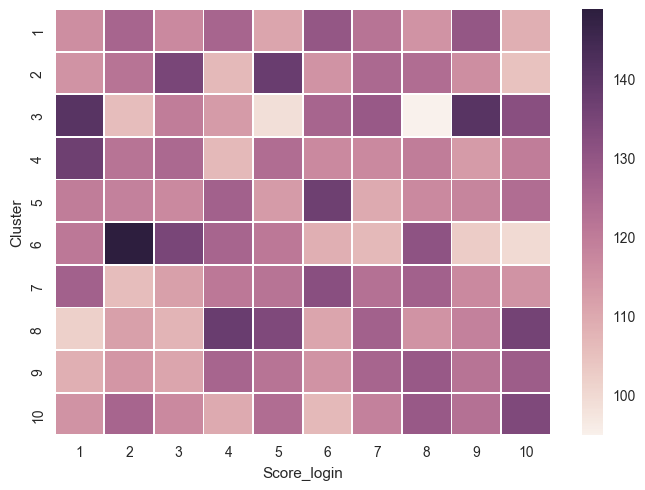

In [300]:
agg_dict_heatmap = {'cd_Login' : 'count'}
heatmap = df_basefinal.groupby(['Cluster','Score_login']).agg(agg_dict_heatmap).copy()
heatmap.reset_index(inplace= True)
heatmap = heatmap.pivot('Cluster','Score_login', 'cd_Login').copy()
sns.heatmap(heatmap, annot=False, linewidths=.5) 
heatmap

In [301]:
df_basefinal['GrupoDesativacao'] = [cria_grupo(n1, n2) for n1, n2 in zip (df_basefinal.Cluster,df_basefinal.Score_login)]

In [303]:
df_basefinal.head().T

,0,1,2,3,4
index,0,1,2,3,4
cd_Login,5asec_idc,ADMMAGIFLUX,AFPM,AG3TELECOM,AGSPecas
mes_idade_cliente,146,72,59,71,80
ds_Periodicidade_indice,1,2,1,2,0
valor_cliente,5871.9,115.8,238.8,90.1,108.8
valor_provisioning,533.809,38.6,47.76,45.05,54.4
MRR_aux,49812.6,3051,7535.6,6397.1,3996
mes_idade_provisioning,19.5455,20,42.6,71,36
qtd_produtos_cliente,11,3,5,2,2
fl_ServicoPai_indice,2,2,2,2,2


In [304]:
df_basefinal.cd_Login.duplicated().value_counts()

False    12022
Name: cd_Login, dtype: int64

In [305]:
agg_dict_heatmap = {'cd_Login' : 'count'}

relatorio = df_basefinal.groupby(['GrupoDesativacao']).agg(agg_dict_heatmap).copy()
relatorio['Tamanho%'] = relatorio.cd_Login/relatorio.cd_Login.sum()

In [307]:
relatorio[['Tamanho%']]

,Tamanho%
GrupoDesativacao,
Grupo1: d+7,0.155058
Grupo2: d+10,0.365060
Grupo3: d+15,0.307779
Grupo4: d+30,0.172103


In [308]:
df_basefinal.columns

Index(['index', 'cd_Login', 'mes_idade_cliente', 'ds_Periodicidade_indice',
       'valor_cliente', 'valor_provisioning', 'MRR_aux',
       'mes_idade_provisioning', 'qtd_produtos_cliente',
       'fl_ServicoPai_indice', 'Score_login', 'Prob_Pagamento', 'Cluster',
       'GrupoDesativacao'],
      dtype='object')

In [310]:
agg_dict_heatmap = {'cd_Login' : 'count',
                    'mes_idade_cliente' : 'mean',
                    'valor_cliente' : 'mean',
                    'valor_provisioning' : 'mean',
                    'MRR_aux' : 'mean',
                    'mes_idade_provisioning' : 'mean',
                    'qtd_produtos_cliente' : 'mean',
                    'Score_login' : 'mean',
                    'Prob_Pagamento' : 'mean',
                    'Cluster' : 'mean'}

relatorio = df_basefinal.groupby(['GrupoDesativacao']).agg(agg_dict_heatmap).copy()
relatorio.T

GrupoDesativacao,Grupo1: d+7,Grupo2: d+10,Grupo3: d+15,Grupo4: d+30
Prob_Pagamento,0.610955,0.615231,0.718848,0.718606
valor_provisioning,47.768365,46.513109,78.891136,87.538694
valor_cliente,110.936384,96.049196,1026.913483,1016.595078
MRR_aux,1920.936217,1980.571320,49375.912156,45179.172267
qtd_produtos_cliente,2.023438,2.030339,11.736295,11.172951
Cluster,1.990513,6.963261,3.464436,8.519356
mes_idade_provisioning,26.776489,27.087882,53.108501,51.312649
mes_idade_cliente,61.069196,60.000237,104.695811,107.786325
Score_login,2.968750,3.015406,7.978353,8.508798
cd_Login,1792.000000,4219.000000,3557.000000,1989.000000


In [311]:
df_basefinal.cd_Login.duplicated().value_counts()

False    12022
Name: cd_Login, dtype: int64

In [ ]:
Mode 

In [80]:
result = pd.merge(LoginsCiclo_20082017, df_cobranca_aplicacao, how='inner', on=['cd_Login'])

result.shape

(37, 8)

In [81]:
result.sample()

,cd_Login,index,Prob_Pagamento,Score_login,cd_provisioning,Resposta,Cluster,GrupoDesativacao
3,comercialaltodofarol,92782,0.728486,8,1,1,7,Grupo4: d+30
